### Math2Tex

In [4]:
from mathtotex.lexer import Lexer

# Reload modules automatically
%load_ext autoreload
%autoreload 2

lexer = Lexer()

print("----------------------------------------------")
file = open("examples/" + 'example1.txt', 'r')
print(file.read())
file.close()
print("----------------------------------------------")

lexer.lex_file("examples/" + 'example1.txt')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
----------------------------------------------
math{
    equation{
        int(a, b, pow(x, 2+ALPHA), dx) = 3x+5
    }
}
----------------------------------------------


[KW_MATH(math),
 L_CURL_BRACKET({),
 KW_EQUATION(equation),
 L_CURL_BRACKET({),
 IDENTIFIER(int),
 L_PAREN((),
 IDENTIFIER(a),
 COMMA(,),
 IDENTIFIER(b),
 COMMA(,),
 IDENTIFIER(pow),
 L_PAREN((),
 IDENTIFIER(x),
 COMMA(,),
 LIT_INT(2),
 OP_PLUS(+),
 GREEK_LETTER(ALPHA),
 R_PAREN()),
 COMMA(,),
 IDENTIFIER(dx),
 R_PAREN()),
 EQUOP_EQUAL(=),
 LIT_INT(3),
 IDENTIFIER(x),
 OP_PLUS(+),
 LIT_INT(5),
 R_CURL_BRACKET(}),
 R_CURL_BRACKET(})]

In [5]:
from mathtotex.parser import Parser

lexer = Lexer()
lexems = lexer.lex_file("examples/" + 'example1.txt')
parser = Parser(lexems)
ast = parser.parse()
print(ast)

Parsing successful!


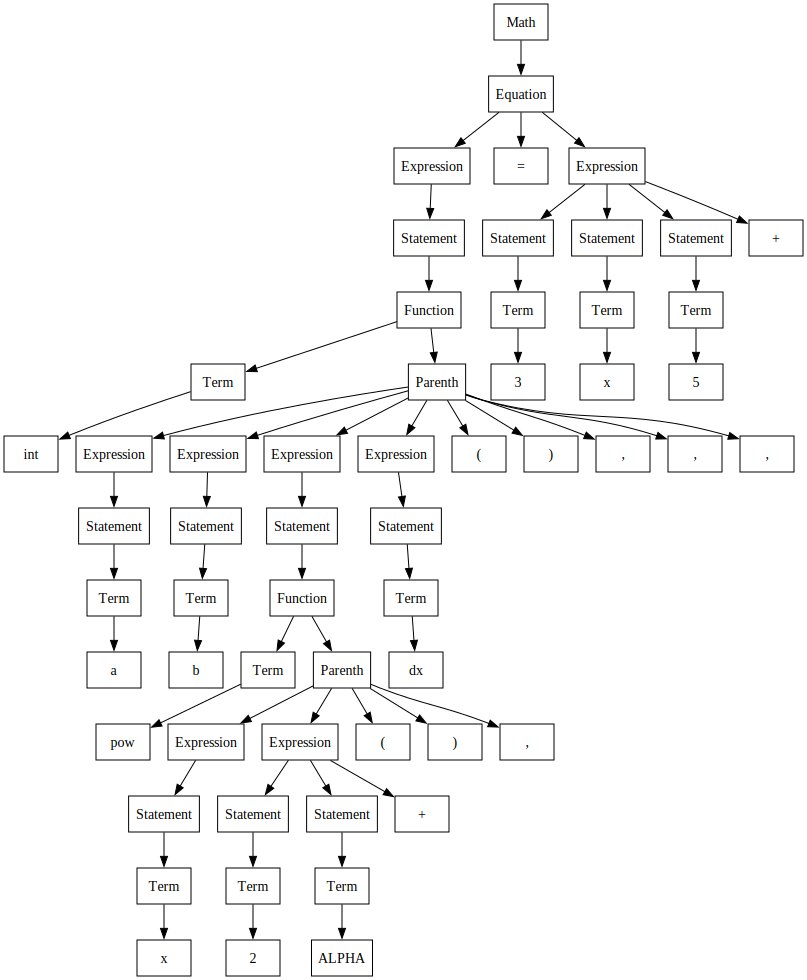

In [6]:
from mathtotex.graph import GraphGenerator

graph = GraphGenerator()
graph.generate_graph(ast)

In [11]:

from mathtotex.visitor import LatexGeneratorVisitor

# -*- encoding: utf-8 -*-
from mathtotex.parser import Parser
from mathtotex.lexer import Lexer

%reload_ext autoreload
%autoreload 2

lexer = Lexer()
lexems = lexer.lex_file(file='examples/example2.txt')
parser = Parser(lexems=lexems)
print('———————————————————————————————————————————————')
with open('examples/example2.txt', 'r') as f:
    print(f.read())
print('———————————————————————————————————————————————')
ast = parser.parse()

visitor = LatexGeneratorVisitor()
ast.accept(visitor)

print('———————————————————————————————————————————————')
print('Formatted code: ')
visitor.get_text()

# Lexing done! ✅
———————————————————————————————————————————————
math{
    equation{
        y = 3x+5
    }
}
———————————————————————————————————————————————
Parsing successful!
———————————————————————————————————————————————
Formatted code: 
\begin{math}
    \begin{equation}
        y = 3 + x5
    \end{equation}
\end{math}
